In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Container_tonnage.csv')

In [3]:
df.head()

,Month,Container Traffic\n (Tonnage)
0,01-01-1995,8000
1,01-01-1996,9582
2,01-01-1997,11476
3,01-01-1998,13745
4,01-01-1999,16462


In [4]:
df.tail()

,Month,Container Traffic\n (Tonnage)
21,01-01-2016,1105000
22,01-01-2017,1411000
23,01-01-2018,1743000
24,01-01-2019,1920000
25,01-01-2020,2277000


In [5]:
df.columns=["Year","Container_tonnage"]
df.head()

,Year,Container_tonnage
0,01-01-1995,8000
1,01-01-1996,9582
2,01-01-1997,11476
3,01-01-1998,13745
4,01-01-1999,16462


In [6]:
df['Year']=pd.to_datetime(df['Year'])

In [7]:
df.head()

,Year,Container_tonnage
0,1995-01-01,8000
1,1996-01-01,9582
2,1997-01-01,11476
3,1998-01-01,13745
4,1999-01-01,16462


In [8]:
df.set_index('Year',inplace=True)
df.head()

,Container_tonnage
Year,
1995-01-01,8000
1996-01-01,9582
1997-01-01,11476
1998-01-01,13745
1999-01-01,16462


In [9]:
df.describe()

,Container_tonnage
count,2.600000e+01
mean,5.421147e+05
std,6.549758e+05
min,8.000000e+03
25%,2.425000e+04
50%,2.920000e+05
75%,7.332500e+05
max,2.277000e+06


<Axes: xlabel='Year'>

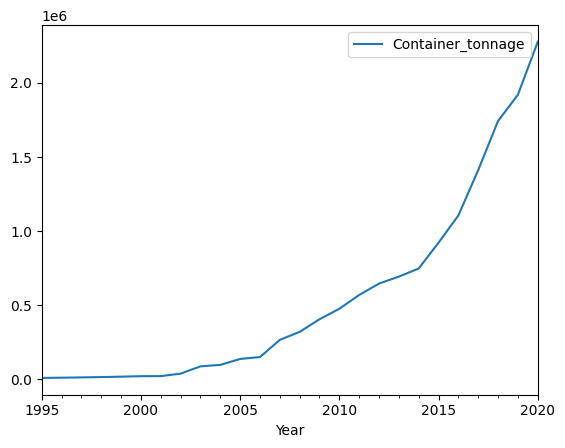

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(Container_tonnage):
    result=adfuller(Container_tonnage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df['Container_tonnage'])

ADF Test Statistic : 9.232132982848034
p-value : 1.0
#Lags Used : 0
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
df['Container_tonnage First Difference'] = df['Container_tonnage'] - df['Container_tonnage'].shift(1)

In [15]:
adfuller_test(df['Container_tonnage First Difference'].dropna())

ADF Test Statistic : 2.1733749571325784
p-value : 0.9988598736665818
#Lags Used : 8
Number of Observations Used : 16
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
import statsmodels.api as sm

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model=sm.tsa.statespace.SARIMAX(df['Container_tonnage'],order=(1, 0, 0),seasonal_order=(3,3,3,7))
results=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/

<Axes: xlabel='Year'>

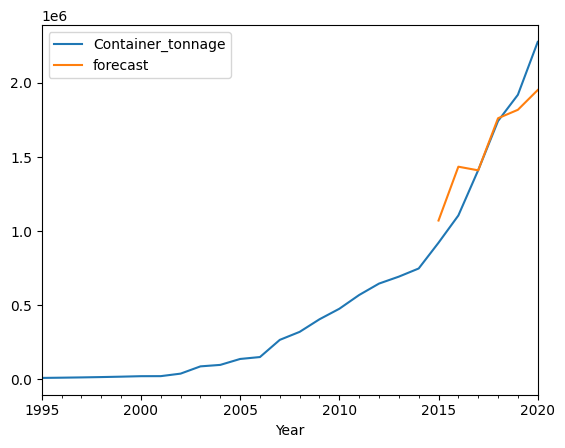

In [20]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Container_tonnage','forecast']].plot()

In [23]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,6)]

In [24]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [25]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

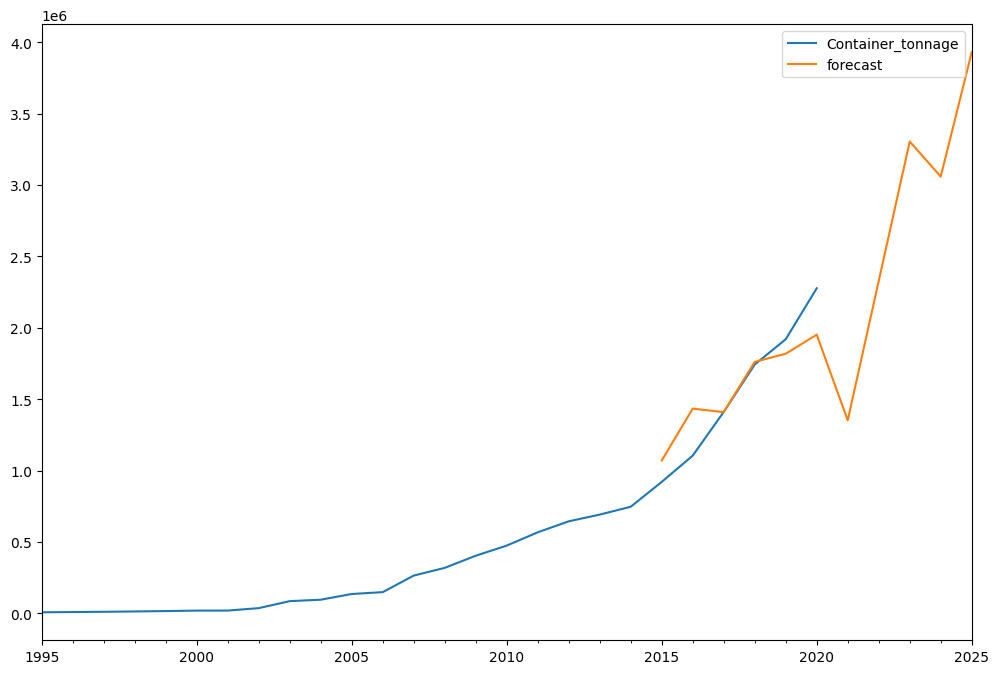

In [26]:
future_df['forecast'] = results.predict(start = 20, end = 32, dynamic= True)  
future_df[['Container_tonnage', 'forecast']].plot(figsize=(12, 8))

In [27]:
future_df[['Container_tonnage', 'forecast']]

,Container_tonnage,forecast
1995-01-01,8000,NaN
1996-01-01,9582,NaN
1997-01-01,11476,NaN
1998-01-01,13745,NaN
1999-01-01,16462,NaN
2000-01-01,19717,NaN
2001-01-01,20000,NaN
2002-01-01,37000,NaN
2003-01-01,86000,NaN
2004-01-01,96000,NaN
